In [8]:
%matplotlib inline
import matplotlib.pyplot as plt


In [34]:
import pandas as pd

df = pd.read_csv('/Users/chengjun/github/cjc2016/data/tianya_bbs_threads_list.txt', sep = "\t", header=None)
df[:2]

,0,1,2,3,4,5,6
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41


In [60]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:5]

,title,link,author,author_page,click,reply,time
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41
2,"宁波准备停止PX项目了,元芳,你怎么看?",/post-free-2848797-1.shtml,牧阳光,http://www.tianya.cn/36535656,82779,625,2012-10-28 19:11
3,"【吴钩一言堂】漳州PX成""二踢响"",说明老百姓科学素质不低",/post-free-5043260-1.shtml,挑灯看吴钩,http://www.tianya.cn/36959960,45304,219,2015-04-07 21:30
4,PX是否有毒?宁波镇海事件谁在推波助澜(转载),/post-free-2848995-1.shtml,zzjzzpgg12,http://www.tianya.cn/53134970,38132,835,2012-10-28 21:08


In [55]:
da = pd.read_csv('/Users/chengjun/github/cjc2016/data/tianya_bbs_threads_author_info.txt', sep = "\t", header=None)
da[:2]

,0,1,2,3,4
0,http://www.tianya.cn/50499450,152,27452,1020,1341
1,http://www.tianya.cn/74341835,0,1,2,5


In [61]:
da=da.rename(columns = {0:'author_page', 1:'followed_num', 2:'fans_num',3:'post_num', 4:'comment_num'})
da[:5]

,author_page,followed_num,fans_num,post_num,comment_num
0,http://www.tianya.cn/50499450,152,27452,1020,1341
1,http://www.tianya.cn/74341835,0,1,2,5
2,http://www.tianya.cn/36535656,19,28,816,1268
3,http://www.tianya.cn/36959960,25,307,513,1237
4,http://www.tianya.cn/53134970,17,22,79,3256


In [68]:
df.author_page[0] == da.author_page[0] 

True

In [67]:
type(da.author_page[0])

str

In [124]:
data = pd.concat([df,da], axis=1)
len(data)

467

In [126]:
data[:3]

,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59,http://www.tianya.cn/50499450,152,27452,1020,1341
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41,http://www.tianya.cn/74341835,0,1,2,5
2,"宁波准备停止PX项目了,元芳,你怎么看?",/post-free-2848797-1.shtml,牧阳光,http://www.tianya.cn/36535656,82779,625,2012-10-28 19:11,http://www.tianya.cn/36535656,19,28,816,1268


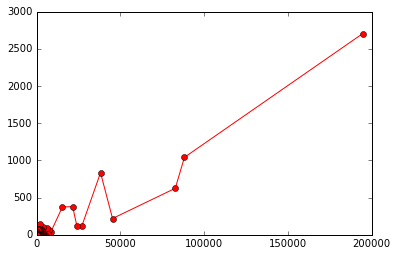

In [13]:

plt.plot(df.click, df.reply, 'r-o')
plt.show()

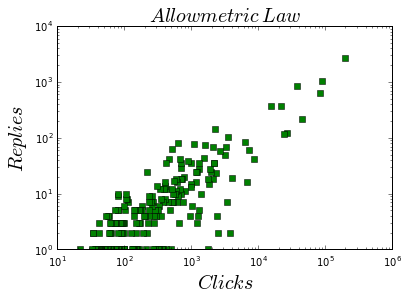

In [16]:
plt.plot(df.click, df.reply, 'gs')
plt.xlabel('$Clicks$', fontsize = 20)
plt.ylabel('$Replies$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('$Allowmetric\,Law$', fontsize = 20)
plt.show()

# Statsmodels

http://statsmodels.sourceforge.net/

Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator. Researchers across fields may find that statsmodels fully meets their needs for statistical computing and data analysis in Python. Features include:

- Linear regression models
- Generalized linear models
- Discrete choice models
- Robust linear models
- Many models and functions for time series analysis
- Nonparametric estimators
- A collection of datasets for examples
- A wide range of statistical tests
- Input-output tools for producing tables in a number of formats (Text, LaTex, HTML) and for reading Stata files into NumPy and Pandas.
- Plotting functions
- Extensive unit tests to ensure correctness of results
- Many more models and extensions in development

In [19]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [21]:
# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 16 Apr 2016   Prob (F-statistic):           1.90e-08
Time:                        23:39:42   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [134]:
def transformData(dat):
    results = []
    for i in dat:
        if i != 'na':
            results.append( int(i))
        else:
            results.append(0)
    return results

In [135]:
data.followed_num = transformData(data.followed_num )

In [136]:
type(data.followed_num[0])

numpy.int64

In [137]:
reg = smf.ols('reply ~ click + followed_num', data=data).fit()

In [138]:
print reg.summary()

                            OLS Regression Results                            
Dep. Variable:                  reply   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3231.
Date:                Sun, 17 Apr 2016   Prob (F-statistic):          4.30e-273
Time:                        02:04:27   Log-Likelihood:                -2354.7
No. Observations:                 467   AIC:                             4715.
Df Residuals:                     464   BIC:                             4728.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.4024      1.766     -0.794   

In [147]:
reg1 = smf.ols('np.log(reply+1) ~ np.log(click+1) +np.log(followed_num+1)', data=data).fit()
print reg1.summary()

                            OLS Regression Results                            
Dep. Variable:      np.log(reply + 1)   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     354.1
Date:                Sun, 17 Apr 2016   Prob (F-statistic):           4.26e-94
Time:                        02:10:36   Log-Likelihood:                -597.55
No. Observations:                 467   AIC:                             1201.
Df Residuals:                     464   BIC:                             1214.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

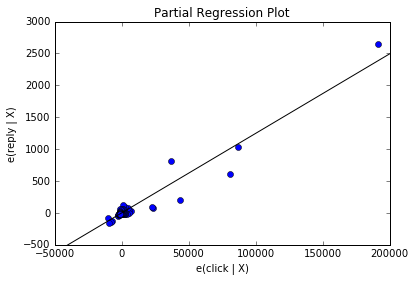

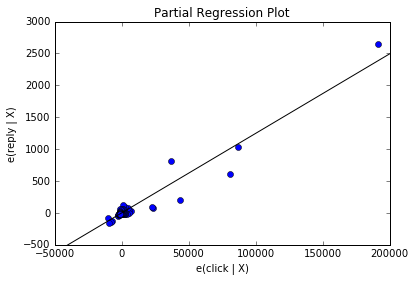

In [139]:
sm.graphics.plot_partregress('reply', 'click', ['followed_num'], data=data, obs_labels=False)

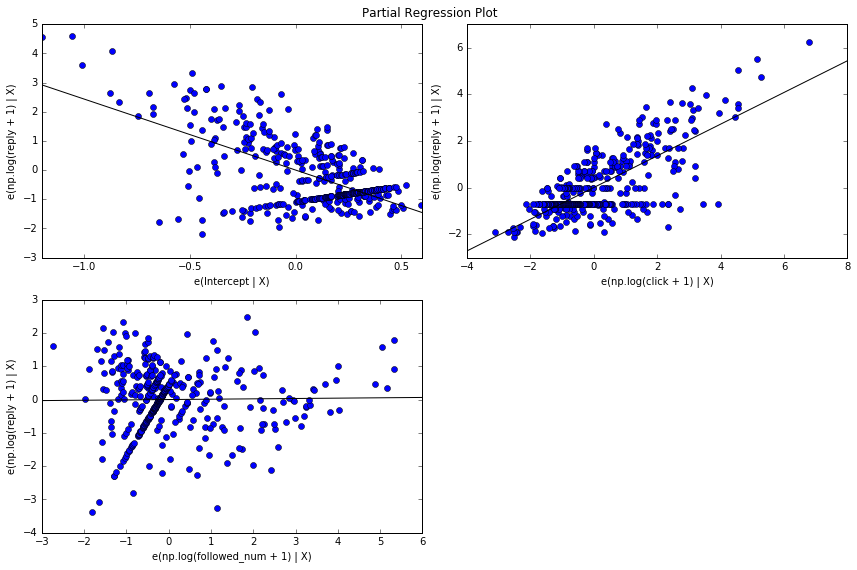

In [148]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg1, fig = fig)
plt.show()
